In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
model = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades+'haarcascade_frontalface_default.xml'))


In [ ]:
# img = cv2.imread('lena.jpg')
# img = cv2.imread('messi5.jpg')
img = cv2.imread('multi_face.jpeg')
plt.imshow(img[:,:,::-1])

In [ ]:
def grabcut_algorithm(original_image, bounding_box):
    
    segment = np.zeros(original_image.shape[:2],np.uint8)
    
    x,y,width,height = bounding_box
    segment[y:y+height, x:x+width] = 1

    background_mdl = np.zeros((1,65), np.float64)
    foreground_mdl = np.zeros((1,65), np.float64)
    
    cv2.grabCut(original_image, segment, bounding_box, background_mdl, foreground_mdl, 5,
    cv2.GC_INIT_WITH_RECT)

    new_mask = np.where((segment==2)|(segment==0),0,1).astype('uint8')

    original_image = original_image*new_mask[:,:,np.newaxis]

    plt.imshow(original_image)
box = model.detectMultiScale(img)
print(box)
grabcut_algorithm(img[:,:,::-1],box)


In [ ]:
video = cv2.VideoCapture(0)

while video.isOpened():
    _,frame = video.read()
    try:
        face_detector = model.detectMultiScale(frame)
#         print(*face_detector)
        for i in face_detector:
            x,y,w,h = i
#             grabcut_algorithm(frame,i)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),5)
        
#             cv2.imshow("img",frame)
        
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        break
    except:
        continue
    
video.release()
cv2.destroyAllWindows()
 

#### step_1 loading img and converting RGB because it work for RGB
#### Step_2 

In [ ]:
#pip install pillow
#pip3 install imutils
#pip3 install cmake
#pip3 install dlib
#pip3 install face_recognition
# !pip3 install plyer    # For giving notification on desktop

In [ ]:
import face_recognition as fr

In [43]:
import cv2
import numpy as np
import face_recognition as fr    # Opencv library for Face_recognition
import os
from pytube import YouTube    # lIBRARY TO TAKE VIDEO FROM YOUTUBE
from datetime import datetime
from pytube import YouTube
from plyer import notification       ## This library for giving pop on desktop when other student enters in school.
from glob import glob
import matplotlib.pyplot as plt

path = "face_recognition"    # path of my data small dataset for testing


known_image = []                     ## In this we store all our school student images
known_studentName = []               ## In this we store their name 

my_student_img_data = glob(path+'/*.jpg')       # This folder containt student image with their is given to image file resp.

for student in my_student_img_data:

    student_img = cv2.imread(student)
    known_image.append(student_img)
    known_studentName.append(student.split(".")[0])



# writing a function to convert student images to encoding for varification 
def each_student_encode_data(images):
    student_encoding = []
   
    for img in images:
#             print(img)
#         img = img[:,:,::-1]              # Converting Image from BGR to RGB

        face_location = fr.face_locations(img)     # We are using hog model(less accurate but faster) 
#         print(face_location)
        encode = fr.face_encodings(img)[0]
#         print(encode)
        student_encoding.append(encode)
#         print(encode)
    return student_encoding


student_encode_data = each_student_encode_data(known_image)          ## This encoding we save and use for varifying 
# print(len(student_encode_data))
## just now we take the input from CCTV or any other device for detecting and tracking students
# print(len(student_encode_data))

print(fr.face_distance(student_encode_data,student_encode_data[1]))

# video = cv2.VideoCapture(0)      ## here i am putting 0 because i am using my laptop camera


url = "https://www.youtube.com/watch?v=iYVGlxDSdGs"
yt = YouTube(url)
stream = yt.streams.get_lowest_resolution()
video = cv2.VideoCapture(stream.url)


while video.isOpened():
    
    rectify,frame = video.read()
    
    student_img = frame[:,:,::-1]      # Converting Image from BGR to RGB
    student_img = frame
    student_location = fr.face_locations(student_img)
    
    encode_student = fr.face_encodings(student_img)
    if len(student_location):
        cv2.rectangle(student_img,(student_location[0][3],student_location[0][0]),(student_location[0][1],student_location[0][2]),(255,0,0),5)
        cv2.imshow("img",student_img)
   
    for encoding, location in zip(encode_student,student_img):
        matches = fr.compare_faces(student_encode_data,encoding)
        face_dista = fr.face_distance(student_encode_data,encoding)
        
        if min(face_dista)<0.50:       ## This condition for checking their is any face detected is maching with our student data base
            continue
#             match_index = np.argmin(face_dista)
#             name_matched_student = matches[match_index]      # finding the name of that student from our database
#             print(f"hey This student is in our shcool{name_matched_student}")
        else:
            print(" Alert! Alert! This student is not in our shcool.")
            plt.imshow(student_img)
            
# Below line give notification on desktop when persion is not from our school.
#             notification.notify(title = "Alert! Alert!",message = "This student or person is not our school Please varify it")
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break

video.release()
cv2.destroyAllWindows()

[0.96454931 0.         0.81370908]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


KeyboardInterrupt: 

In [1]:
from plyer import notification  # Notification not work for mac this library work for windows aswell as linux
if face_dista.any()>0.55:
    notification.notify(title = "Alert! Alert!",message = "This student or person is not our school Please varify it",toast = True)

NameError: name 'face_dista' is not defined

In [11]:
from glob import glob
import cv2
import face_recognition as fr
image = []
encode = []
for i in glob("face_recognition"+'/*.jpg'):
    img = cv2.imread(i)
    image.append(img)
encod3 =fr.face_encodings(cv2.imread('my.jpg'))[0]
encod1 = fr.face_encodings(image[0])[0]
encod2 = fr.face_encodings(image[1])[0]
encod4 = fr.face_encodings(image[2])[0]
encod =[encod3,encod4,encod1]
dist = fr.compare_faces(encod,encod2)

if any(dist)==True:
    print(dist[dist==True])
    print("wow")
print(dist)

True
wow
[True, False, False]


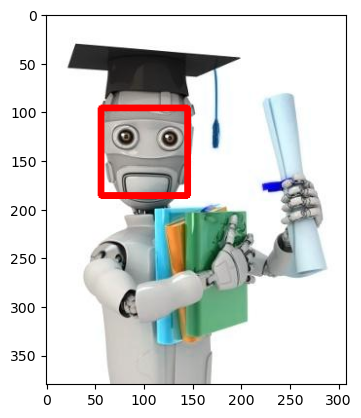

In [25]:
import matplotlib.pyplot as plt
m = cv2.imread('ml.png')
plt.imshow(m)
im = fr.face_locations(m)[0]
en = fr.face_encodings(m)
img = cv2.rectangle(m,(im[3],im[2]),(im[1],im[0]),(255,0,0),5)
plt.imshow(img)

In [ ]:
prij

In [45]:
# if 1:
#     notification.notify(
#     title = 'testing',
#     message = 'message',
#     app_icon = None,
#     timeout = 10,
# )

In [2]:
!pip install object-detection

In [7]:
import object_detection as od

In [53]:
# import cv2
# from matplotlib import pyplot as plt
  
# # Opening image
# img = cv2.imread("my.jpg")
  
# # OpenCV opens images as BRG 
# # but we want it as RGB We'll 
# # also need a grayscale version
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
# # Use minSize because for not 
# # bothering with extra-small 
# # dots that would look like STOP signs
# stop_data = cv2.CascadeClassifier('stop_data.xml')
  
# found = stop_data.detectMultiScale(img_gray, 
#                                    minSize =(20, 20))
  
# # Don't do anything if there's 
# # no sign
# amount_found = len(found)
  
# if amount_found != 0:
      
#     # There may be more than one
#     # sign in the image
#     for (x, y, width, height) in found:
          
#         # We draw a green rectangle around
#         # every recognized sign
#         cv2.rectangle(img_rgb, (x, y), 
#                       (x + height, y + width), 
#                       (0, 255, 0), 5)
          
# # Creates the environment of 
# # the picture and shows it
# plt.subplot(1, 1, 1)
# plt.imshow(img_rgb)
# plt.show()

[ERROR:0@13582.486] global persistence.cpp:505 open Can't open file: 'stop_data.xml' in read mode


error: OpenCV(4.7.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'


In [55]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye_tree_eyeglasses.xml")

In [58]:
eyeCascade.detectMultiScale(img)

array([796, 316,  80,  80], dtype=int32)

In [ ]:
cv2.data.haarcascades+